### Import libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

*Import data*


In [12]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Clear data

In [13]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors (X) and target (y)

In [14]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [15]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [16]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

#### Data normalization

In [17]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


### Build a Neural Network

In [18]:
# define regression model
''' This function create a model were all hidden layers have the same configuration'''
def regression_model(layers, neurons, n_cols, activation, optimizer, loss):
    # create model
    model = Sequential()
    for i in range(layers):
        model.add(Dense(neurons, activation=activation, input_shape=(n_cols,)))
    model.add(Dense(1))
    print(f"Layers created: {i+1}")
    # compile model
    model.compile(optimizer=optimizer, loss=loss)
    return model

In [19]:
# build the model
n_cols = predictors_norm.shape[1] # number of predictors
layers = 1
neurons = 10
model = regression_model(
    layers = layers,
    neurons = neurons,
    n_cols = n_cols,
    activation = "relu",
    optimizer = "adam",
    loss = "mean_squared_error",
)
model

Layers created: 1


1. Randomly split the data into a training and test sets by holding 30% of the data for testing. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

2. Train the model on the training data using 50 epochs

In [21]:
# fit the model
epochs = 50
model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, verbose=2)

Epoch 1/50
16/16 - 1s - loss: 229026.8281 - val_loss: 185316.9844 - 937ms/epoch - 59ms/step
Epoch 2/50
16/16 - 0s - loss: 161727.7344 - val_loss: 132196.2812 - 64ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 117662.1641 - val_loss: 97457.8828 - 81ms/epoch - 5ms/step
Epoch 4/50
16/16 - 0s - loss: 87987.9062 - val_loss: 73874.4688 - 56ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 67231.3047 - val_loss: 56696.6914 - 62ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 51896.2734 - val_loss: 43942.0664 - 65ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 40451.3867 - val_loss: 34273.2422 - 76ms/epoch - 5ms/step
Epoch 8/50
16/16 - 0s - loss: 31701.6211 - val_loss: 26921.8555 - 63ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 25032.2969 - val_loss: 21190.8848 - 60ms/epoch - 4ms/step
Epoch 10/50
16/16 - 0s - loss: 19815.9473 - val_loss: 16744.8828 - 69ms/epoch - 4ms/step
Epoch 11/50
16/16 - 0s - loss: 15744.5654 - val_loss: 13265.2324 - 55ms/epoch - 3ms/step
Epoch 12/50
16/16 - 0s 

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength.

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"The mean squared error is {mse}")

10/10 [==============================] - 0s 1ms/step
The mean squared error is 774.9768693608601


4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

In [23]:
epochs = 50
mse_list = []
for j in range(50):
    print(f"Cicle N: {j+1}")
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

Cicle N: 1
10/10 [==============================] - 0s 2ms/step
Cicle N: 2
10/10 [==============================] - 0s 2ms/step
Cicle N: 3
10/10 [==============================] - 0s 2ms/step
Cicle N: 4
10/10 [==============================] - 0s 2ms/step
Cicle N: 5
10/10 [==============================] - 0s 2ms/step
Cicle N: 6
10/10 [==============================] - 0s 2ms/step
Cicle N: 7
10/10 [==============================] - 0s 1ms/step
Cicle N: 8
10/10 [==============================] - 0s 1ms/step
Cicle N: 9
10/10 [==============================] - 0s 1ms/step
Cicle N: 10
10/10 [==============================] - 0s 2ms/step
Cicle N: 11
10/10 [==============================] - 0s 2ms/step
Cicle N: 12
10/10 [==============================] - 0s 2ms/step
Cicle N: 13
10/10 [==============================] - 0s 2ms/step
Cicle N: 14
10/10 [==============================] - 0s 2ms/step
Cicle N: 15
10/10 [==============================] - 0s 3ms/step
Cicle N: 16
10/10 [===============

5. Report the mean and the standard deviation of the mean squared errors.

In [24]:
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)
print(f"Mean of MSE is: {mse_mean}")
print(f"STD of MSE is: {mse_std}")

Mean of MSE is: 67.33388774314902
STD of MSE is: 34.667493301500095


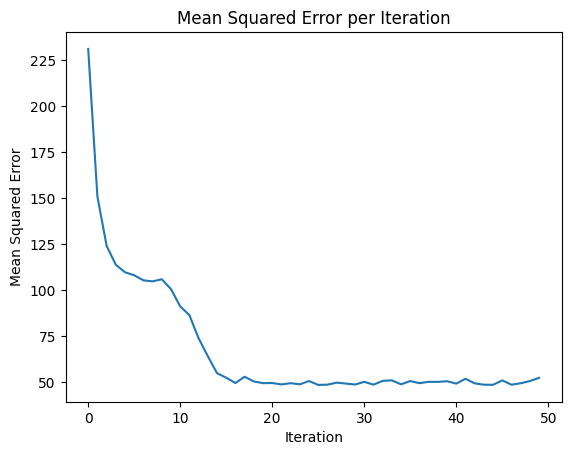

In [25]:
plt.plot(mse_list)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error per Iteration')
plt.show()

How does the mean of the mean squared errors compare to that from Step A?

In previous implementation the next were the results:
- Mean of MSE is: 111.81
- STD of MSE is: 5.10

But now the results are:
- Mean of MSE is: 67.33
- STD of MSE is: 34.66

So, Mean of MSE decreases using a normalization data.
But, STD increases 670%


### Thank you for check my activity!

This notebook was created by [Daniel Sanchez](www.linkedin.com/in/cesar-daniel-sanchez).